<h1> Southern Water Corp Python Case Study Project</h1>



<img src = 'https://www.sdcwa.org/wp-content/uploads/2020/10/Seawater-Desalination.jpg'>

---

#### Problem Statement:
<b>As part of our technical analysis, we need to identify the factors that contributed to pump failure.</b>


# Part I: <span style="color:green">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 



In [196]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 



In [200]:
# Discover the raw dataset
df_raw= pd.read_csv('DF_RAW_DATA.csv')
df_raw.columns=df_raw.columns.str.strip()
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Volumetric Flow Meter 1,2453.0,41.802629,3.656576,0.0,41.05,42.10,43.14,45.90
Volumetric Flow Meter 2,2453.0,41.796702,3.654873,0.0,41.00,42.14,43.13,45.84
Pump Speed (RPM),2453.0,90.796576,10.217885,0.0,85.00,91.00,97.00,124.00
Pump Torque,2453.0,202.851610,22.683977,0.0,191.00,203.00,215.00,264.00
Ambient Temperature,2453.0,50.226661,5.298203,0.0,48.00,51.00,53.00,65.00
Horse Power,2453.0,3.540897,0.579055,0.0,3.22,3.48,3.78,7.56
Pump Efficiency,2453.0,76.015149,6.651633,0.0,74.56,76.62,78.47,83.45
PUMP FAILURE (1 or 0),2453.0,0.021199,0.144075,0.0,0.00,0.00,0.00,1.00


In [329]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2453 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2453 non-null   object 
 2   Volumetric Flow Meter 1  2453 non-null   float64
 3   Volumetric Flow Meter 2  2453 non-null   float64
 4   Pump Speed (RPM)         2453 non-null   int64  
 5   Pump Torque              2453 non-null   int64  
 6   Ambient Temperature      2453 non-null   int64  
 7   Horse Power              2453 non-null   float64
 8   Pump Efficiency          2453 non-null   float64
 9   PUMP FAILURE (1 or 0)    2453 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 191.8+ KB


In [327]:
# Discover the rolling standard deviation dataset
df_stdev= pd.read_csv('DF_Rolling_Stdev.csv')
df_stdev.columns=df_stdev.columns.str.strip()
df_stdev.describe().T

,count,mean,std,min,25%,50%,75%,max
Volumetric Flow Meter 1,2452.0,1.485126,2.294950,0.38,1.07,1.16,1.23,21.39
Volumetric Flow Meter 2,2452.0,1.497361,2.282053,0.64,1.08,1.17,1.26,21.53
Pump Speed (RPM),2452.0,6.648308,5.722897,0.58,5.52,5.99,6.46,59.31
Pump Torque,2452.0,13.945338,12.394302,5.00,11.21,12.18,13.11,124.71
Ambient Temperature,2452.0,3.436370,3.043042,0.90,2.92,3.16,3.37,30.65
Horse Power,2452.0,0.370600,0.299790,0.11,0.28,0.32,0.36,3.32
Pump Efficiency,2452.0,2.725232,4.186723,1.17,1.96,2.12,2.27,39.15
PUMP FAILURE (1 or 0),2452.0,0.021207,0.144104,0.00,0.00,0.00,0.00,1.00


In [203]:
df_stdev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2452 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2452 non-null   object 
 2   Volumetric Flow Meter 1  2452 non-null   float64
 3   Volumetric Flow Meter 2  2452 non-null   float64
 4   Pump Speed (RPM)         2452 non-null   float64
 5   Pump Torque              2452 non-null   float64
 6   Ambient Temperature      2452 non-null   float64
 7   Horse Power              2452 non-null   float64
 8   Pump Efficiency          2452 non-null   float64
 9   PUMP FAILURE (1 or 0)    2452 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 191.7+ KB


**Question 1:**

<b> When looking at the Descriptive Statistics for both datasets; pay attention specifically to the standard deviation and mean. 
What do you observe when you compare the dataframe_raw standard deviation and mean, versus the dataframe_stdev standard deviation and mean?
    
 </b>

##### <b>Answer: 
Rolling standard deviation, also known as moving standard deviation, is a technique used to analyze time series data within a specified time window. When comparing the mean and standard deviation values, rolling standard deviations tend to show more consistent or closer relationships compared to the raw data. This is because rolling standard deviations smooth out fluctuations and provide a clearer view of variability over time. </b>

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 




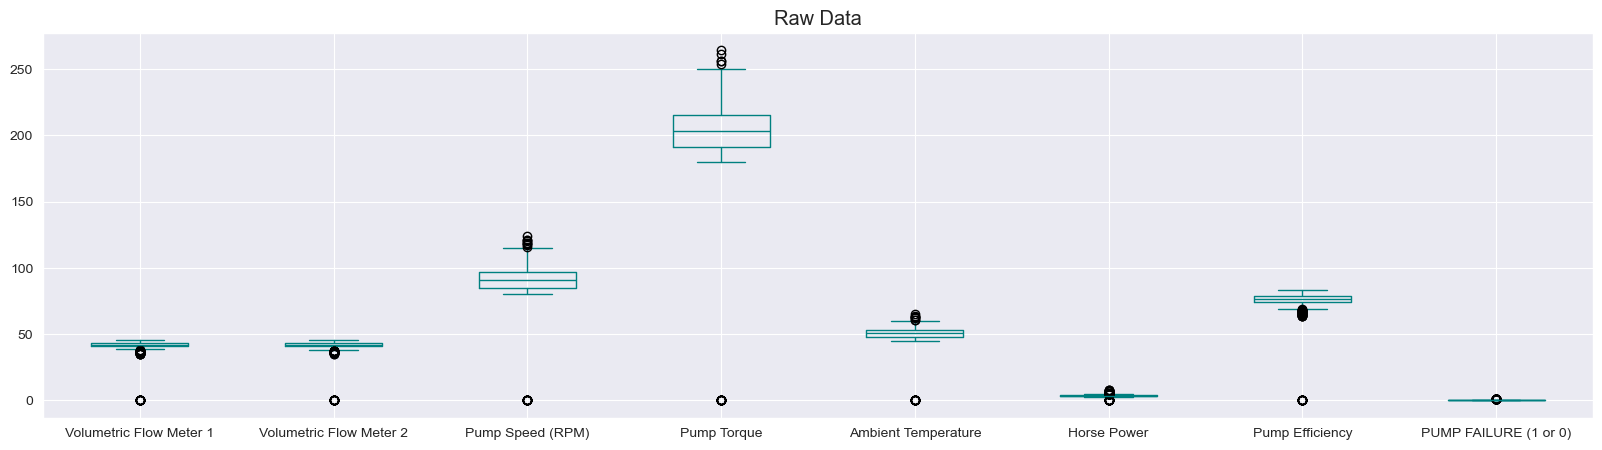

In [208]:
# Create a boxplot for raw data and display the plot.
df_raw.plot(kind='box', title='Raw Data',color='teal')
plt.show()

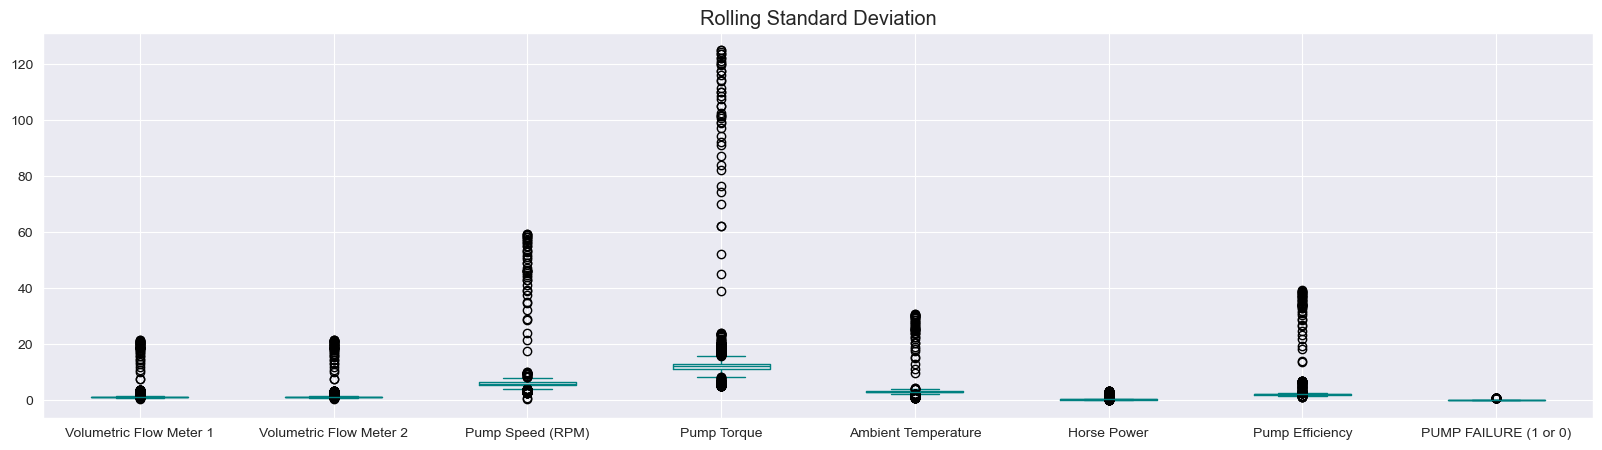

In [209]:
# Create a boxplot for rolling data and display the plot.
df_stdev.plot(kind='box', title='Rolling Standard Deviation',color='teal')
plt.show()

### Step 4: <span style="color:green">Create a Line Chart</span> 

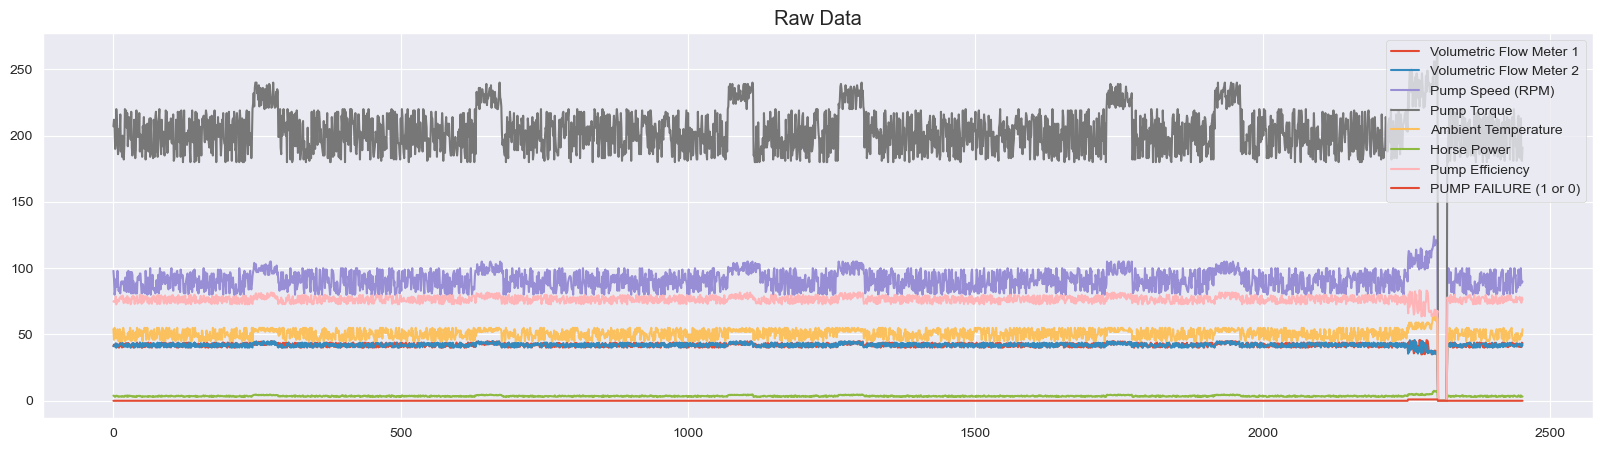

In [211]:
#  Create a line plot for raw data and display the plot.
df_raw.plot(kind='line', title='Raw Data')
plt.show()

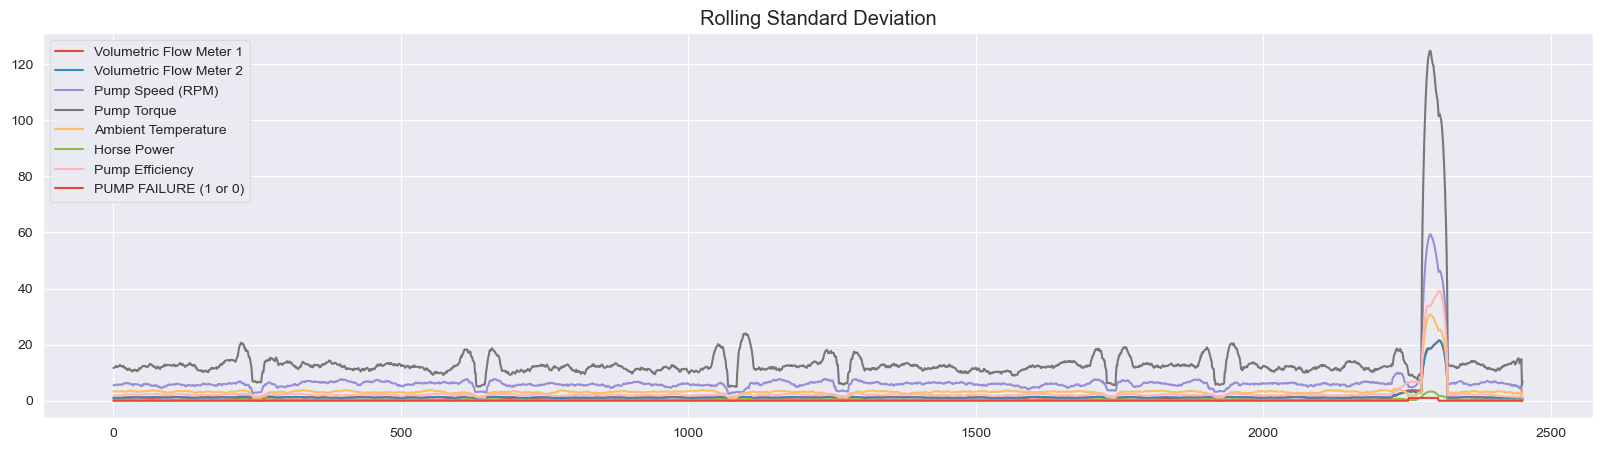

In [212]:
# Create a lineplot for rolling data and display the plot.
df_stdev.plot(kind='line', title='Rolling Standard Deviation')
plt.show()

**Question 2:**

**What have you observed from the boxplot and line plots for both the dataframe_raw and dataframe_stdev datasets?**

##### <b>Answer: 
The plot from stdev datasets provide succind and smoothier trending than those from raw dataset. </b>

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Filtered Dataframes with Box Plots</span> 





<Axes: title={'center': 'Pump Normal'}>

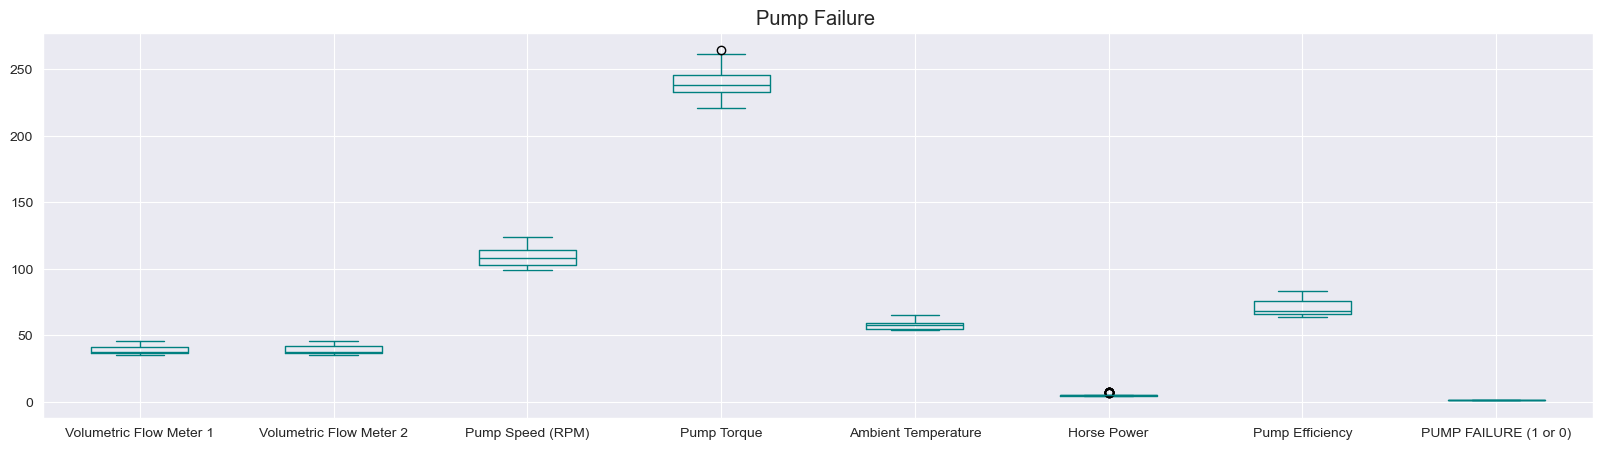

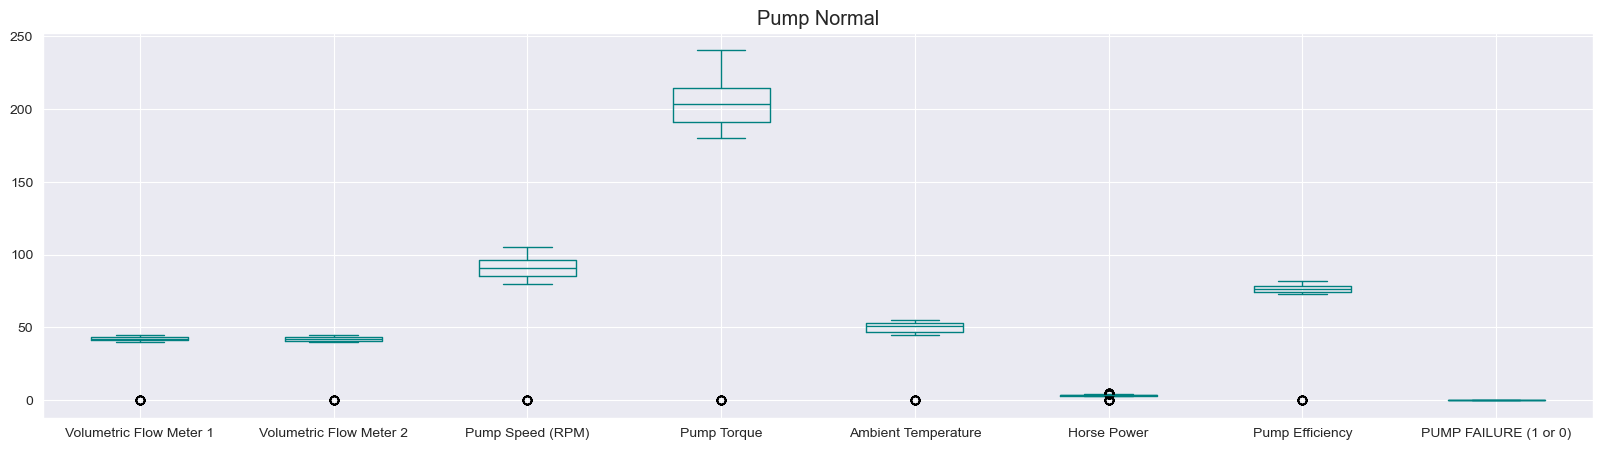

In [218]:
f=df_raw[df_raw['PUMP FAILURE (1 or 0)'] == 1]  # f means failure
n=df_raw[df_raw['PUMP FAILURE (1 or 0)'] == 0]  # n means normal
f.plot(kind='box', title='Pump Failure ',color='teal')
n.plot(kind='box', title='Pump Normal',color='teal')

**Question 3:**

<b> What have you noticed when comparing the dataset in this manner? </b>

##### <b>Answer: 
When comparing the two boxplots, three key parameters emerge: pump speed, pump torque, and ambient temperature. Each of these parameters displays distinct statistics, including the mean, 25th percentile, 75th percentile, interquartile range (IQR), and 1.5 times the IQR. Based on these differences, it is reasonable to infer that these three parameters may be contributing factors to the pump failure. </b>

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Create Quartiles</span> 



Step 1: Create Q1, Q3 for all the columns in the dataframe. 

Step 2: After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.



In [224]:
import pandas as pd
import numpy as np

def iqr(df, columns=None):
    if columns is None:
        columns = df.columns
    
    iqr_values = {}  # Initialize an empty dictionary to store IQR values
    
    for column in columns:
        if column in df.columns:
            # Calculate Q1, Q3, and IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Store the IQR value in the dictionary
            iqr_values[column] = IQR
            
    return pd.DataFrame(iqr_values, index=['IQR']).T
    

# List of columns to check for IQR
cols = [
    'Volumetric Flow Meter 1',
    'Volumetric Flow Meter 2',
    'Pump Speed (RPM)',
    'Pump Torque',
    'Ambient Temperature',
    'Horse Power',
    'Pump Efficiency',
    'PUMP FAILURE (1 or 0)'
]

# Calculate IQR for the specified columns
iqr_raw = iqr(df_raw, cols)
print(iqr_raw)

iqr_stdev=iqr(df_stdev, cols)
print(iqr_stdev)



                           IQR
Volumetric Flow Meter 1   2.09
Volumetric Flow Meter 2   2.13
Pump Speed (RPM)         12.00
Pump Torque              24.00
Ambient Temperature       5.00
Horse Power               0.56
Pump Efficiency           3.91
PUMP FAILURE (1 or 0)     0.00
                          IQR
Volumetric Flow Meter 1  0.16
Volumetric Flow Meter 2  0.18
Pump Speed (RPM)         0.94
Pump Torque              1.90
Ambient Temperature      0.45
Horse Power              0.08
Pump Efficiency          0.31
PUMP FAILURE (1 or 0)    0.00


---------------------------------------------------------------------------

### Step 7:  <span style="color:green">Identify Outliers and Filter Outliers</span> 

   

<b> Please print out the percentage of data that remains after we've removed the Outliers from the dataframe_raw dataset.</b>

In [228]:
import pandas as pd
import numpy as np

def remove_outliers(df, columns=None):
    if columns is None:
        columns = df.columns
    
    df_cleaned = df.copy()
    
    for column in columns:
        if column in df_cleaned.columns:
            # Calculate Q1, Q3, and IQR
            Q1 = df_cleaned[column].quantile(0.25)
            Q3 = df_cleaned[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define bounds for outlier detection
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Filter out outliers
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound).any(axis=0)]
    
    return df_cleaned
cols = [
    'Volumetric Flow Meter 1',
    'Volumetric Flow Meter 2',
    'Pump Speed (RPM)',
    'Pump Torque',
    'Ambient Temperature',
    'Horse Power',
    'Pump Efficiency',
    'PUMP FAILURE (1 or 0)'
]

no_outliers = remove_outliers(df_raw, cols)
print(no_outliers.shape, df_raw.shape)
outlier_percent = round(2400/2453*100, 2)
print(f'The percentage of remains after removing outliers is: {outlier_percent}%')

(2400, 10) (2453, 10)
The percentage of remains after removing outliers is: 97.84%


#### **Question 4:**

<b> Now that you've removed the Outliers and discovered you still have a significant amount of data left - do you think removing Outliers is problematic or not? Please state your answer below and explain what your thoughts are. </b> 


##### <b>Answer: 
Since outliers represent less than 2.5% of the data, their removal is unlikely to impact the analysis significantly. The remaining 97.84% of the data will still provide substantial value for generating actionable insights. </b>

---------------------------------------------------------------------------


### Step 8:  <span style="color:green">Create a Boxplot Without Outliers</span> 



<Axes: title={'center': 'Pump Normal(0)'}>

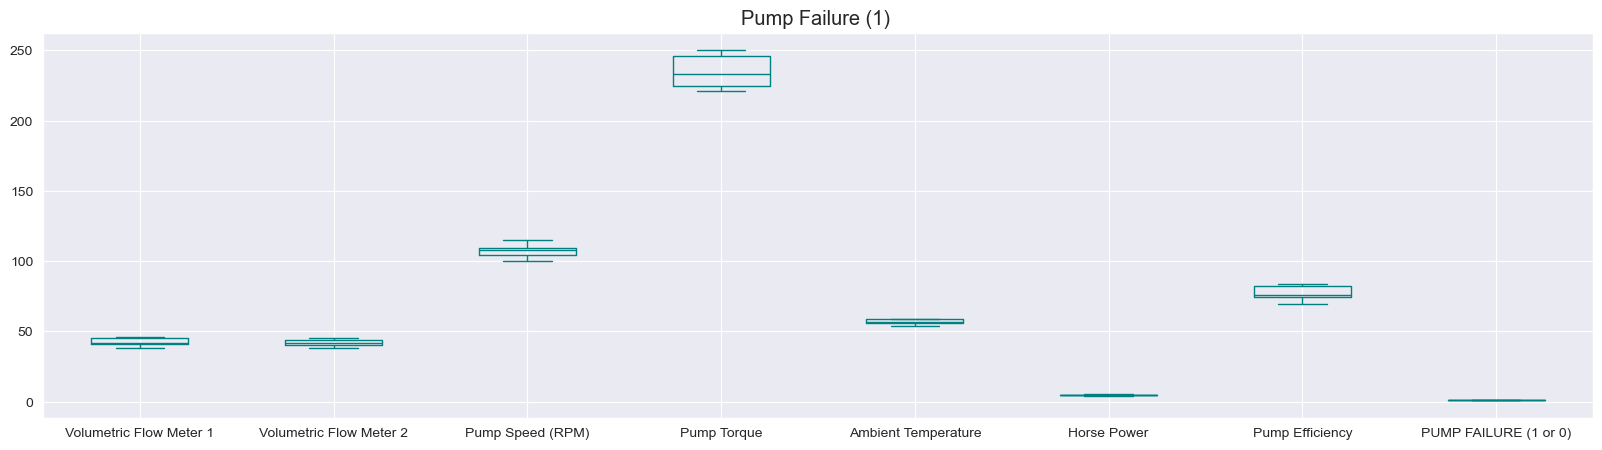

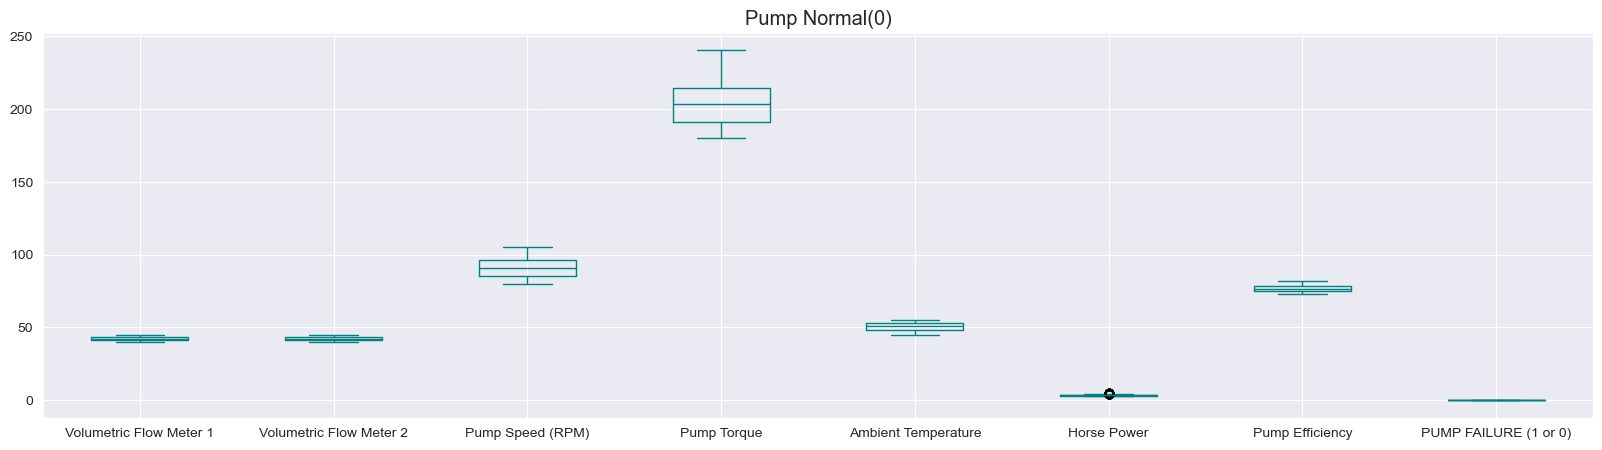

In [233]:
# Make new dataframes containing no outliers for raw and rolling std data.
f1=no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 1]  # f means failure
n1=no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 0]  # n means normal

# Display the boxplots
f1.plot(kind='box', title='Pump Failure (1) ', color='teal')
n1.plot(kind='box', title='Pump Normal(0)',color='teal')

### Step 9:  <span style="color:green">Plot and Examine Each Column</span> 



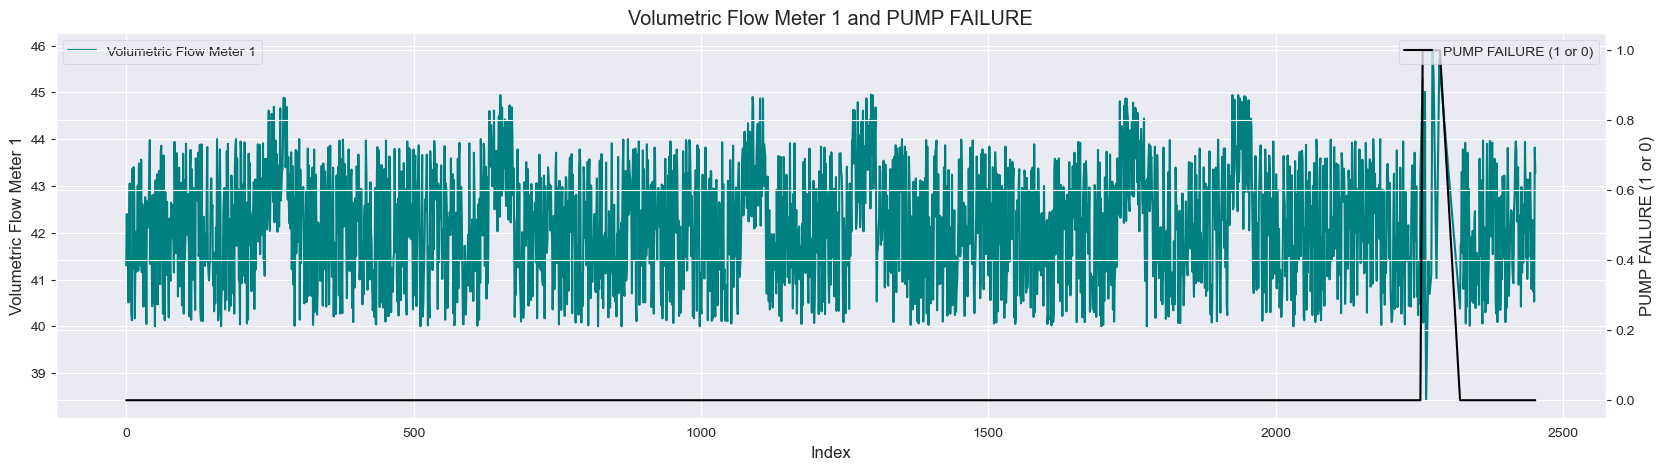

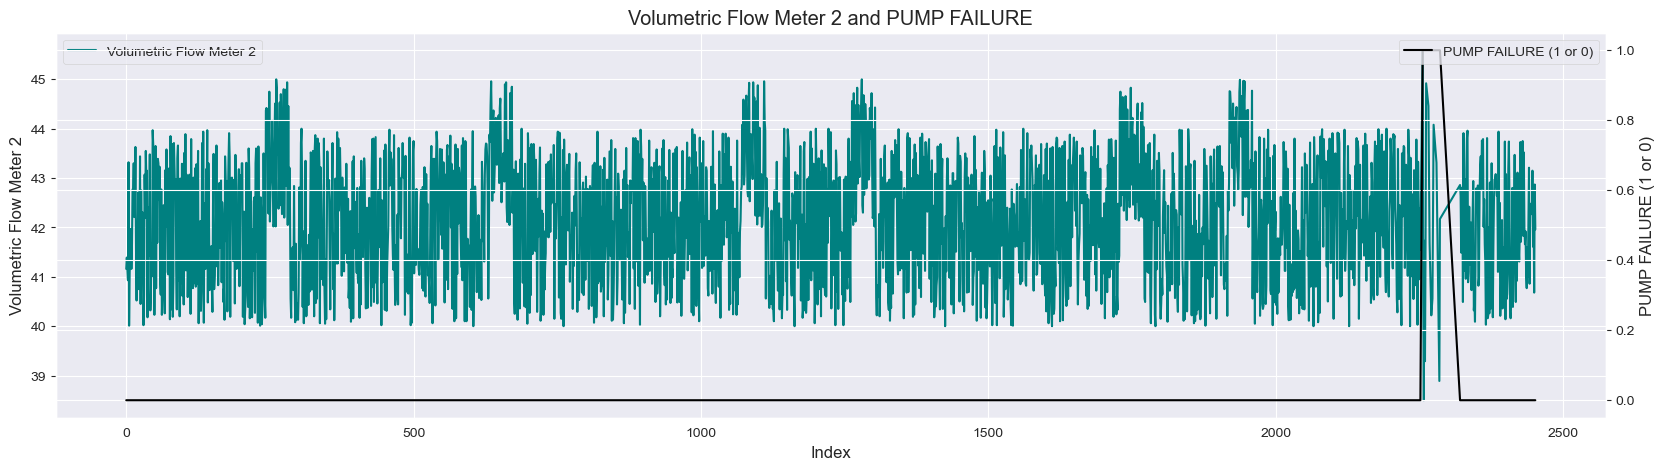

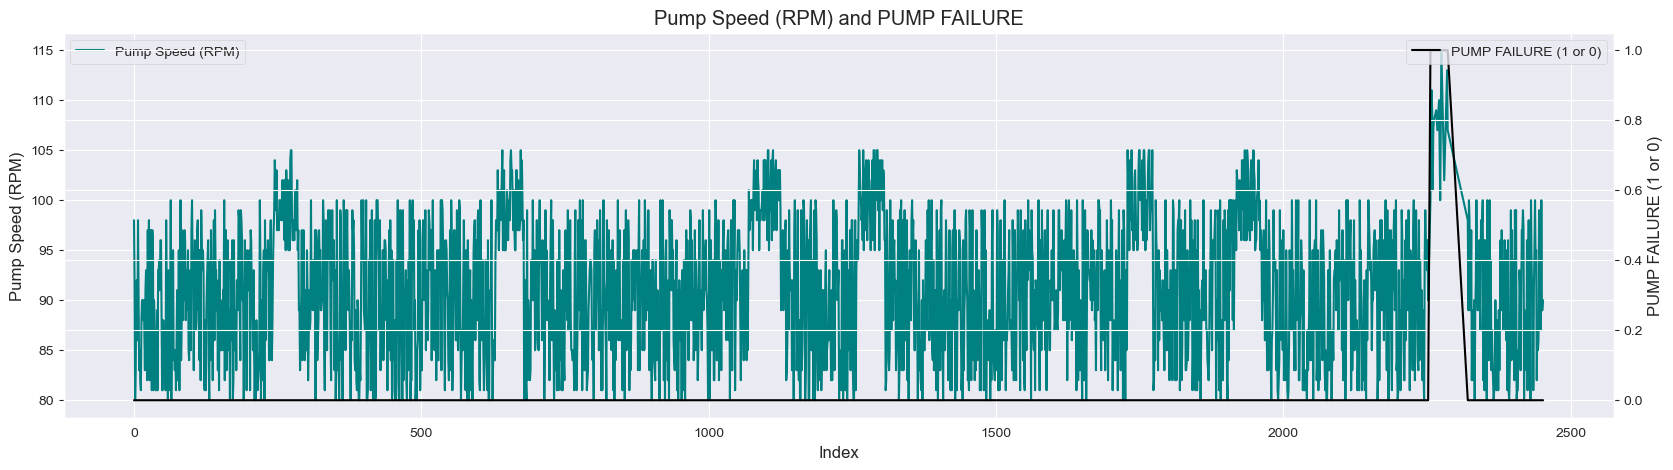

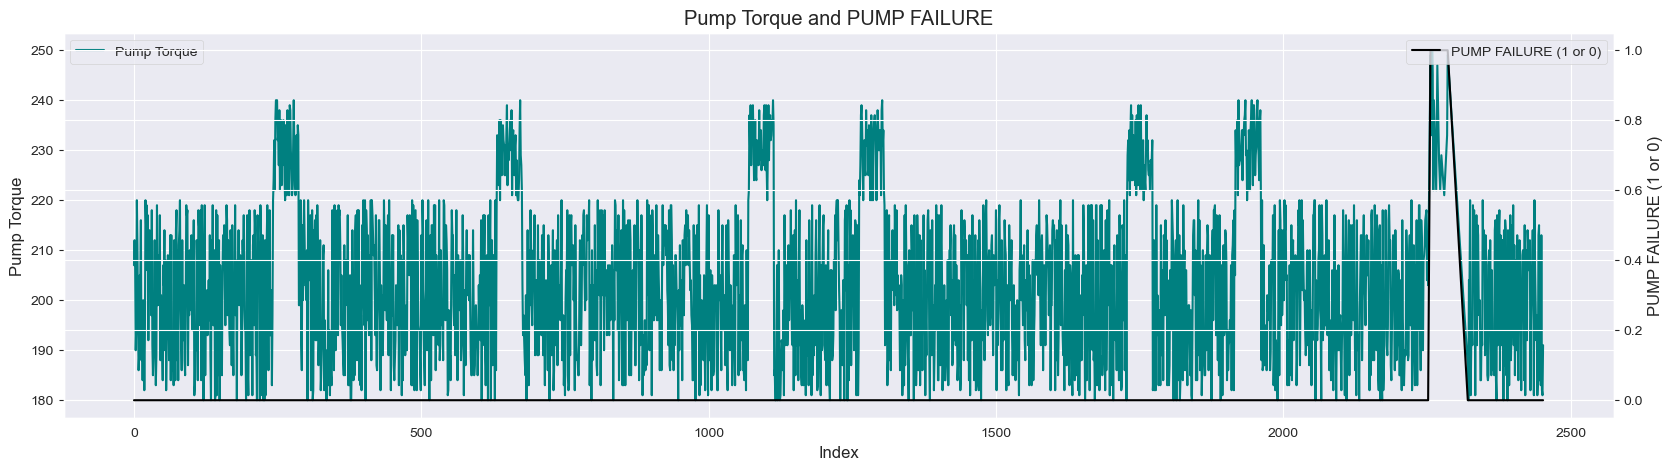

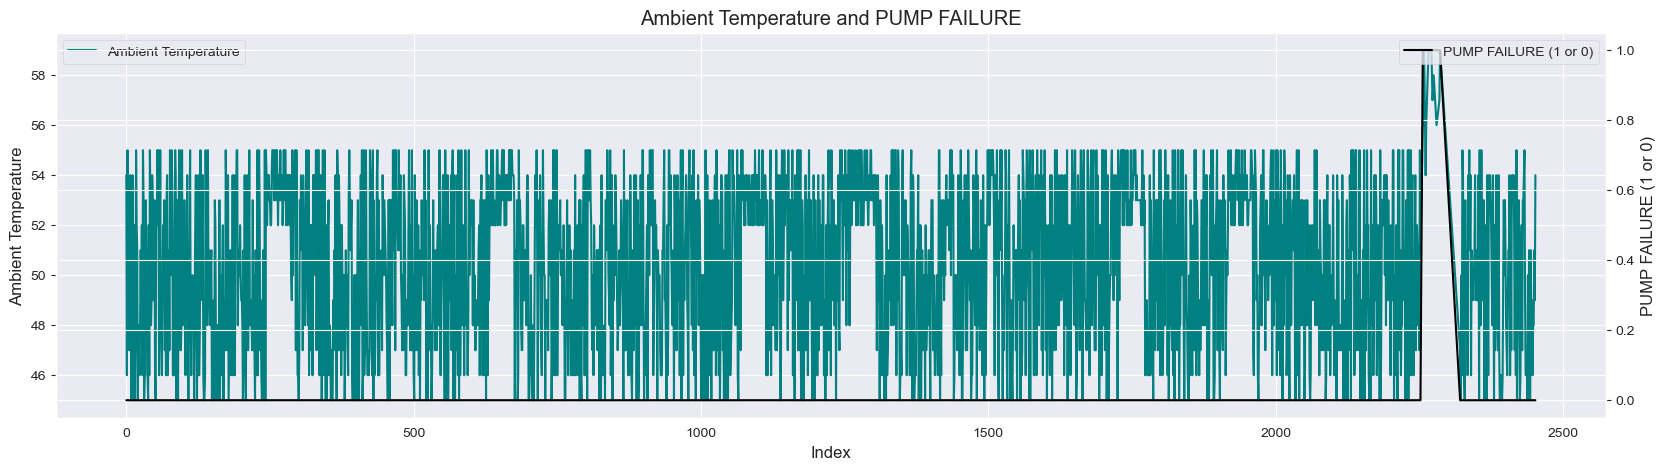

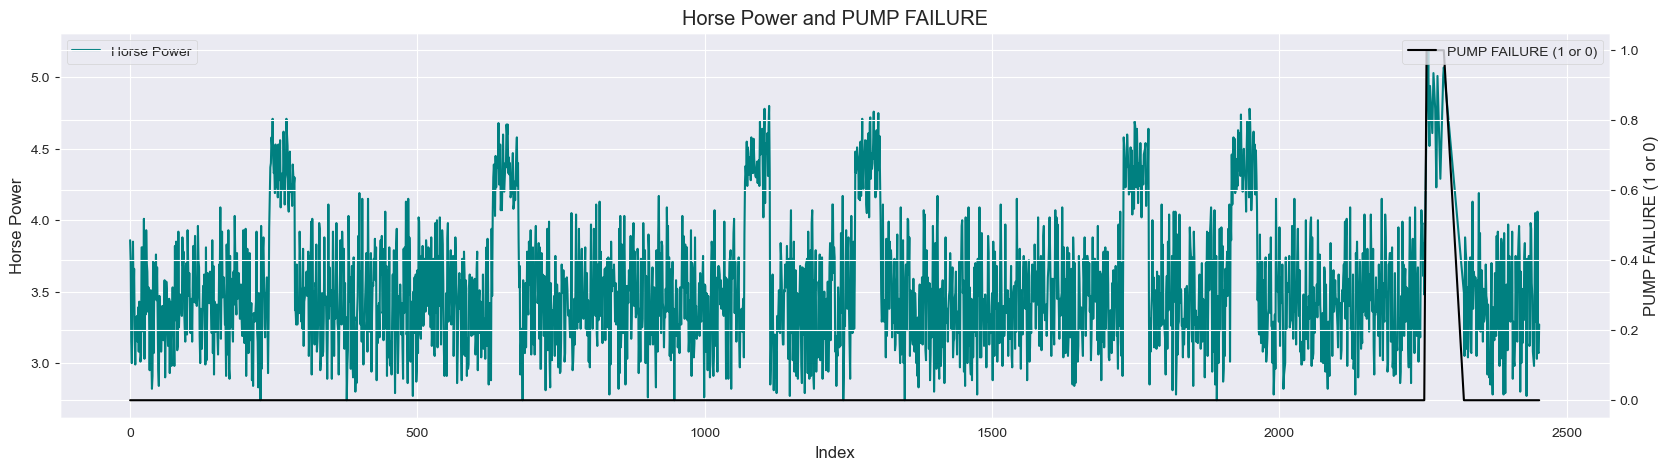

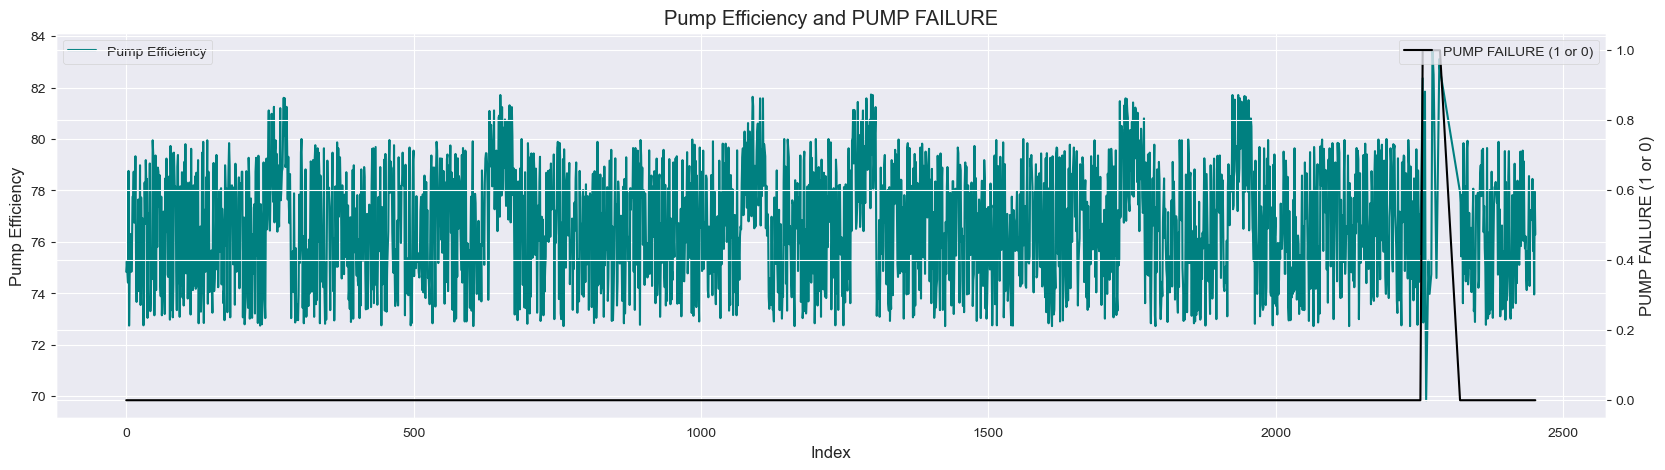

In [235]:
import matplotlib.pyplot as plt


# Define a function to iterate through the list of variables
def TwoAxisPlot(df, list_of_variables):    
    for i in list_of_variables:          
        first_axis = df[i].plot(label=i, color='teal')  # Plot the first variable
        second_axis = first_axis.twinx()  # Create a secondary y-axis
        
        # Plot the second variable on the secondary y-axis
        if 'PUMP FAILURE (1 or 0)' in df.columns:
            second_axis.plot(df.index, df['PUMP FAILURE (1 or 0)'], color='black', label='PUMP FAILURE (1 or 0)')
        
        # Set labels and title
        first_axis.set_xlabel('Index')
        first_axis.set_ylabel(i)
        second_axis.set_ylabel('PUMP FAILURE (1 or 0)')
        plt.title(f'{i} and PUMP FAILURE')
        
        # Optionally, add legends
        first_axis.legend(loc='upper left')
        second_axis.legend(loc='upper right')
        
        plt.show()  # Show plot for each variable

# define the list of var
list_of_variables = [
    'Volumetric Flow Meter 1',
    'Volumetric Flow Meter 2',
    'Pump Speed (RPM)',
    'Pump Torque',
    'Ambient Temperature',
    'Horse Power',
    'Pump Efficiency',
]

# Call the function and display the plot for each one of the variables.
# Plot each variable with a secondary y-axis against Pump failure.
TwoAxisPlot(no_outliers, list_of_variables)


#### **Question 5:**
<b>
Have you noticed any particular trends when looking at the data in this way? Has it made it easier to see which variables *might* be reacting more strongly to the Pump Failure than others? </b> 

##### <b>Answer: 
Based on the graphs, it is NOT easy to see or detect which variable might be reacting more strongly to the pump failure than others. </b>

---


### Step 10:  <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 



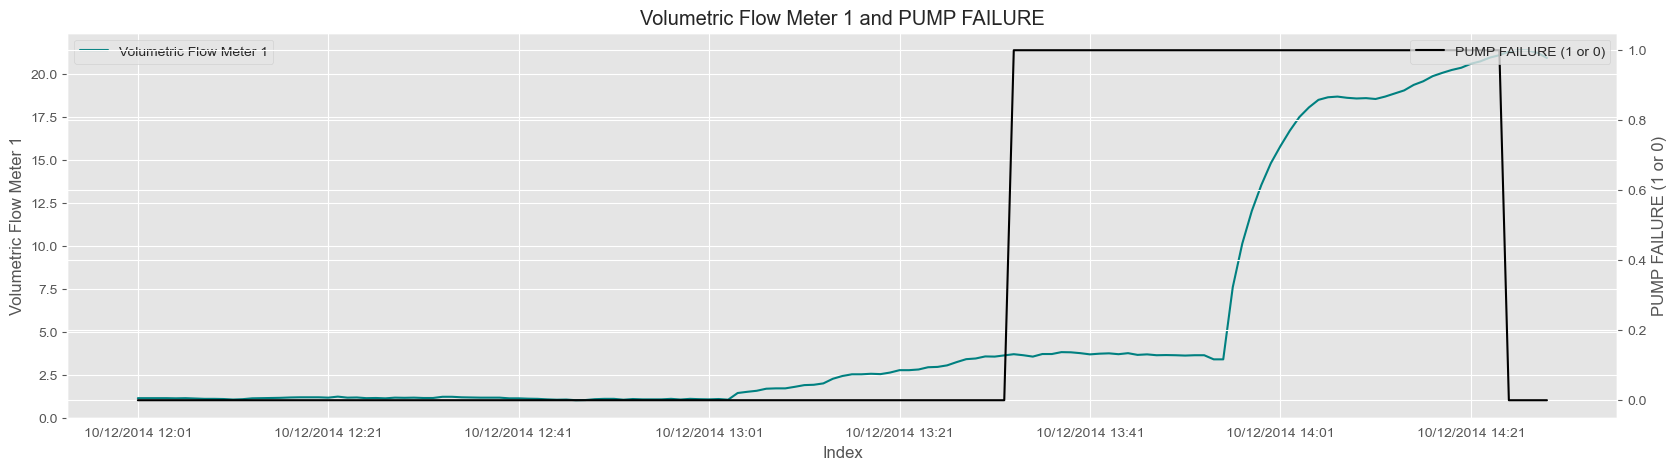

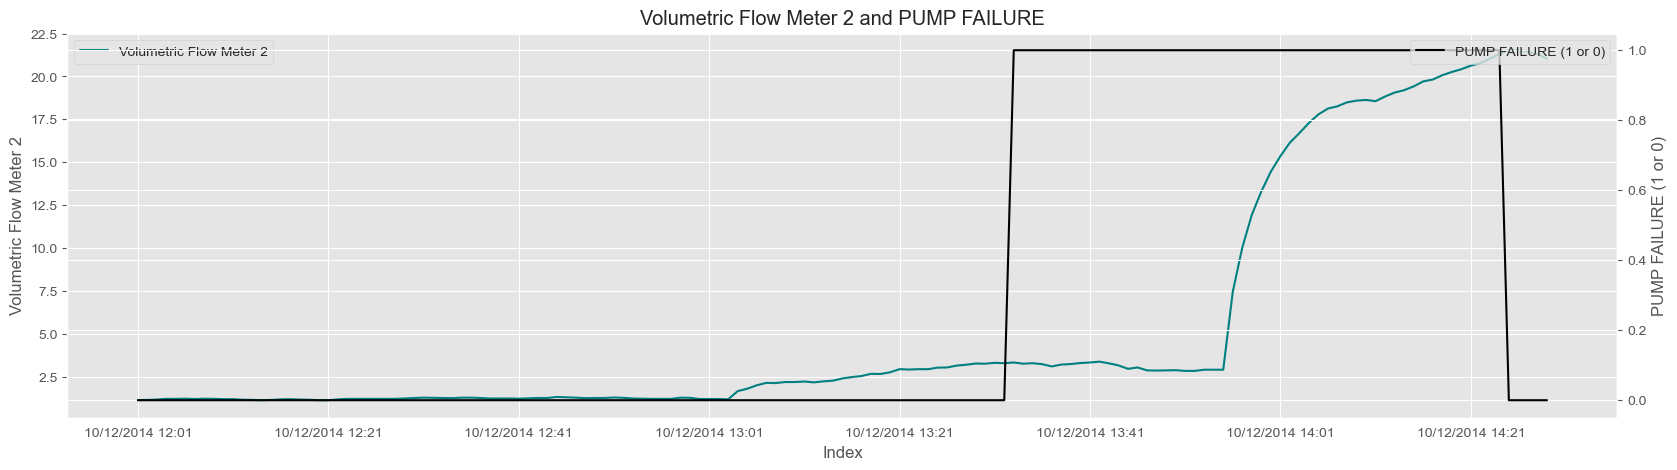

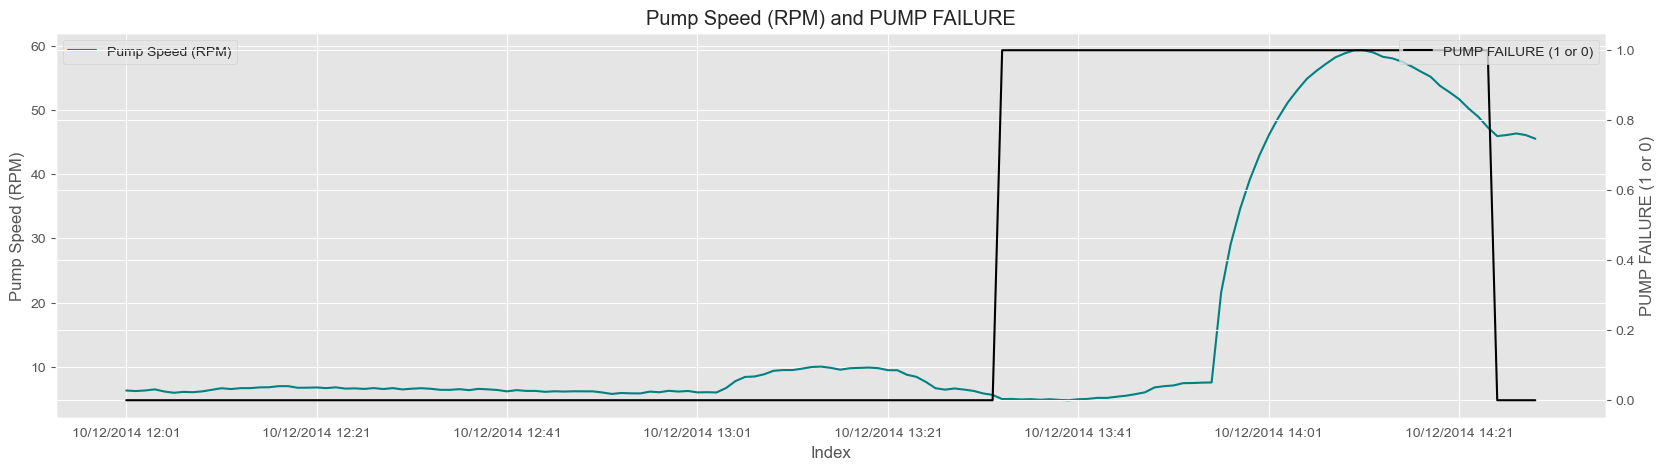

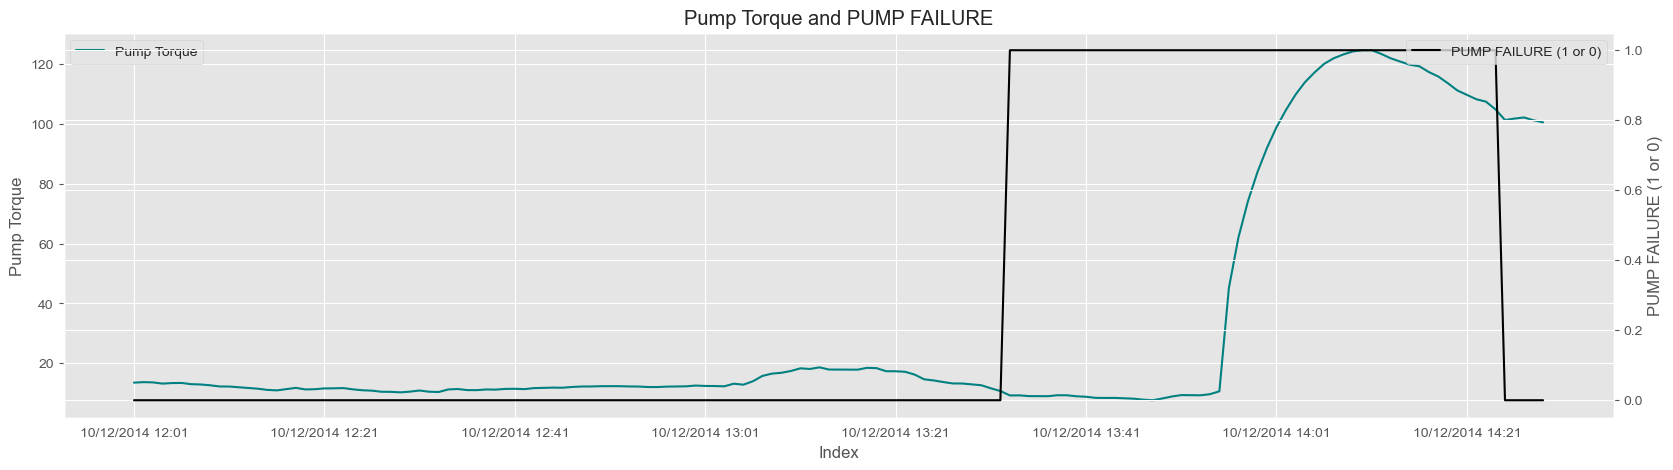

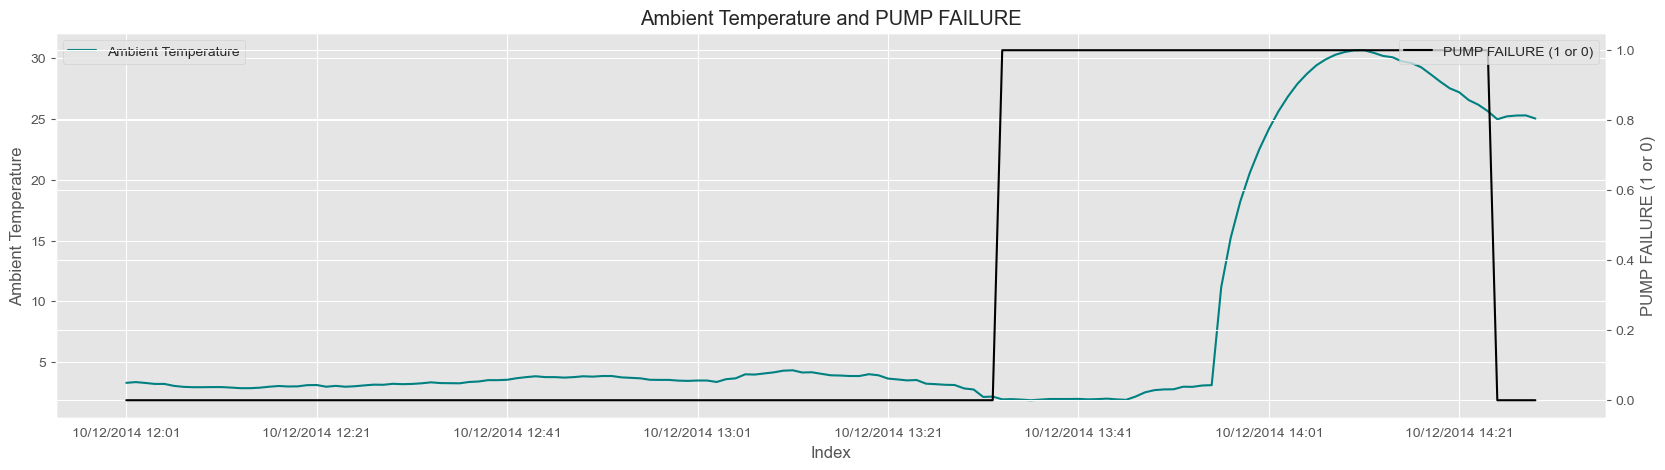

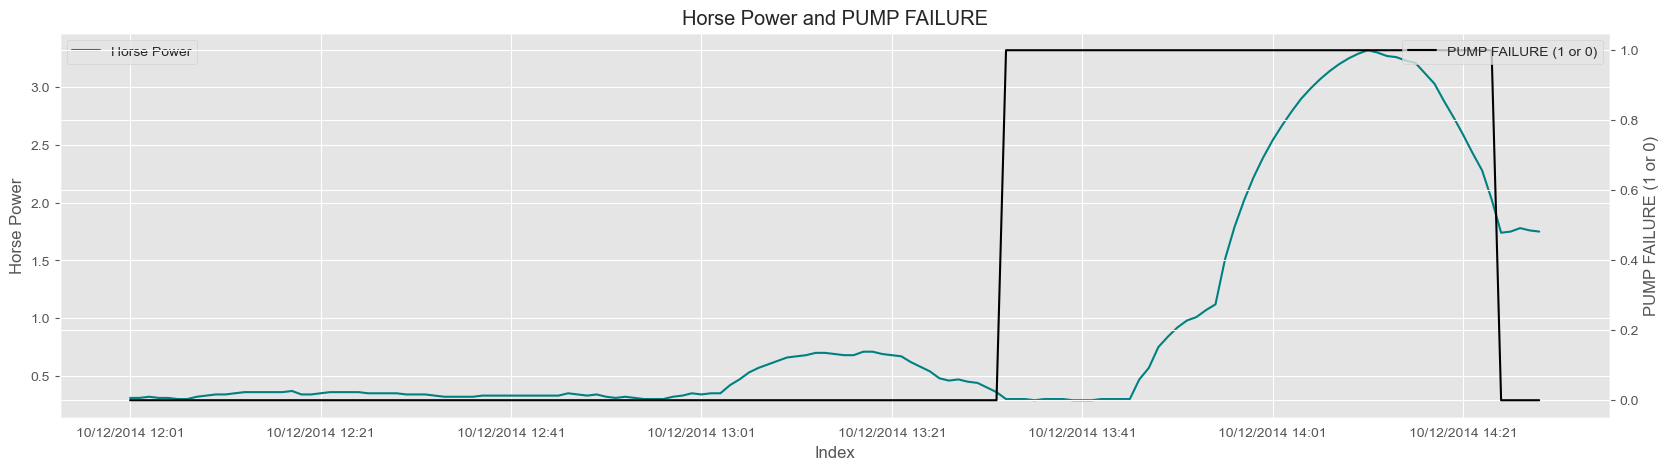

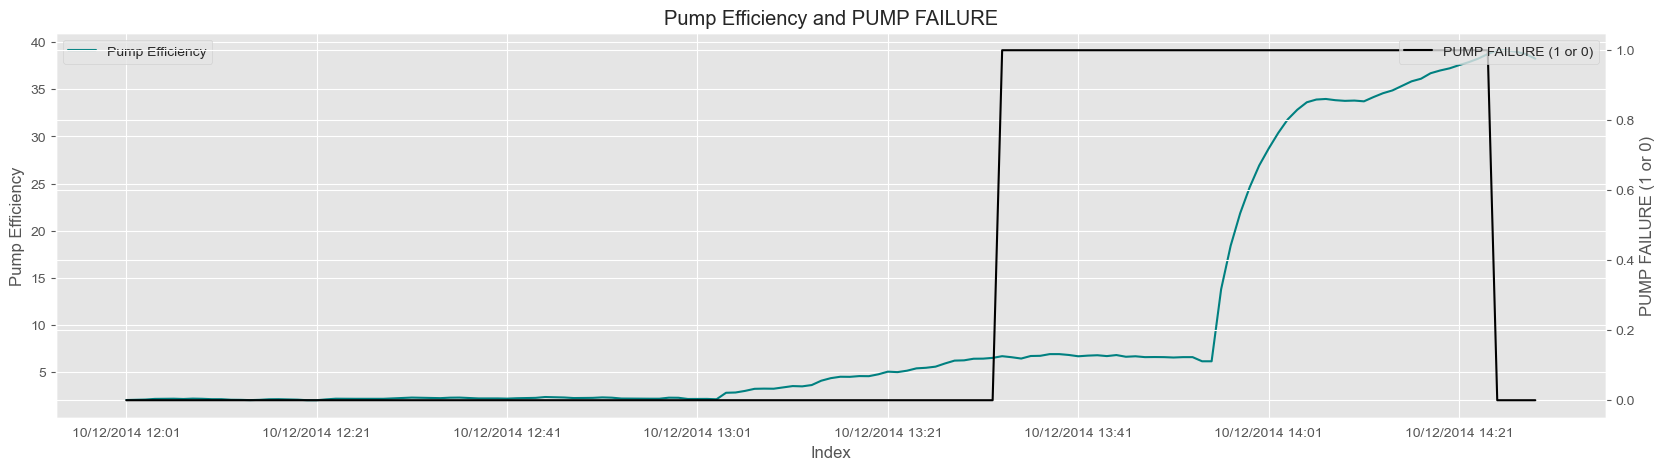

In [335]:
# Set the 'TIMEFRAME (DD/MM/YYYY)' column as the index
dfr_stdev = df_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')

# Filter the DataFrame for the following periods: 10/12/2014 12:00 to 10/12/2014 14:30.
filtered_dfr_stdev = dfr_stdev.loc[
    (dfr_stdev.index > '10/12/2014 12:00') & (dfr_stdev.index < '10/12/2014 14:30')
]

# Reuse the function TwoAxisPlot and call
# PLot each variable against Pump failure as a secondary y-axis
TwoAxisPlot(filtered_dfr_stdev, list_of_variables)


---

# Part II: <span style="color:green">Inferential Statistical Analysis</span>

### Step 11:  <span style="color:purple">Create a Heatmap</span> 


In [337]:
# Delete unrelated columns in raw dataset.
df_raw_1= df_raw.drop(columns='Data Source')
# Set TIMEFRAME as index column
df_raw_1=df_raw_1.set_index('TIMEFRAME (DD/MM/YYYY)')

<Axes: >

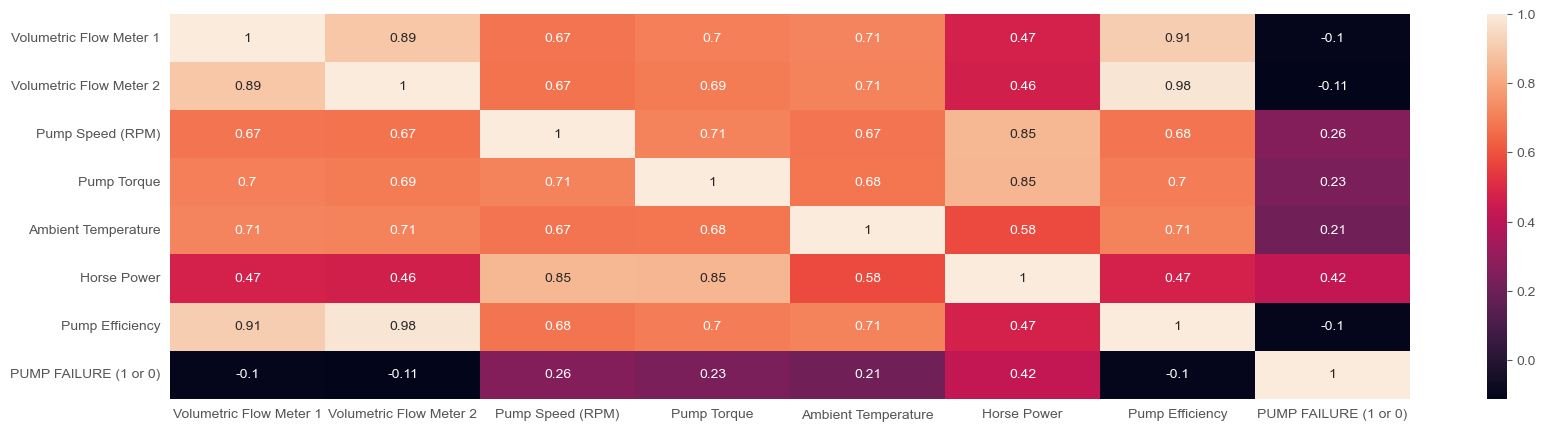

In [339]:
# Create a correlated dataframe
corr_matrix_raw = df_raw_1.corr()
# Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the dataframe_raw dataset.
sns.heatmap(corr_matrix_raw, annot=True)

#### Question 6:

**Which variables seem to correlate with Pump Failure?**


#### Answer:<b>

Horse Power, Pump Speed(RPM), Pump Torque, and Ambient Temperature seem to correlate with Pump Failure.
</b>


### Step 12:  <span style="color:purple">Create a Barplot of Correlated Features</span>


<Axes: ylabel='PUMP FAILURE (1 or 0)'>

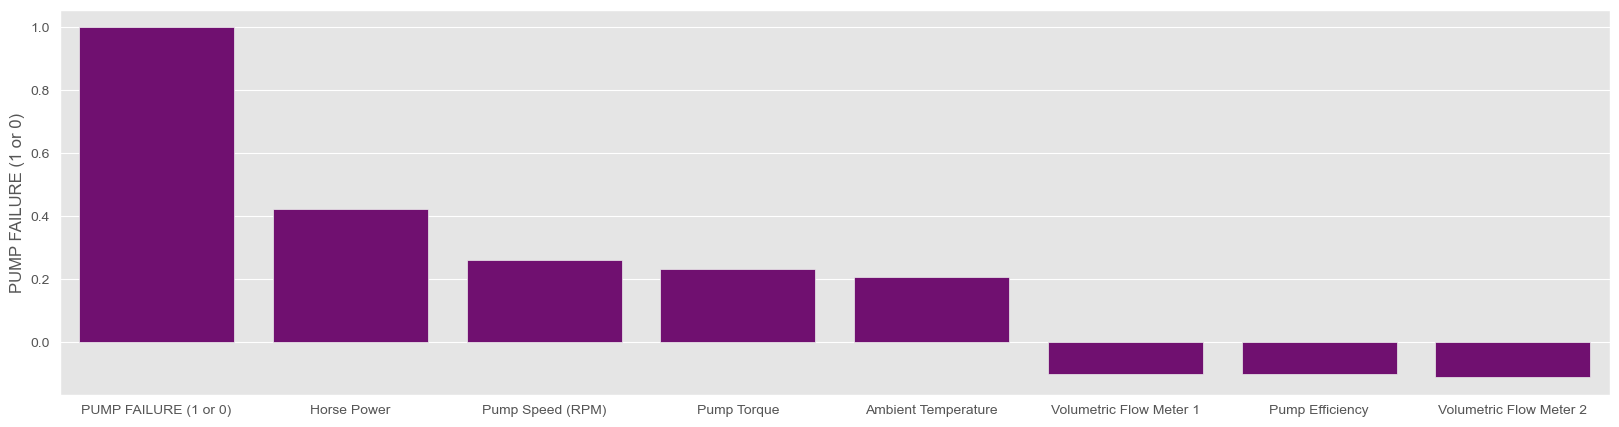

In [341]:
# Sort correlated dataframe
corr_matrix_raw=corr_matrix_raw.sort_values(by='PUMP FAILURE (1 or 0)', ascending=False)

# display the barplot
sns.barplot(data=corr_matrix_raw['PUMP FAILURE (1 or 0)'], color='purple')


---

### Step 13:  <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 


<Axes: >

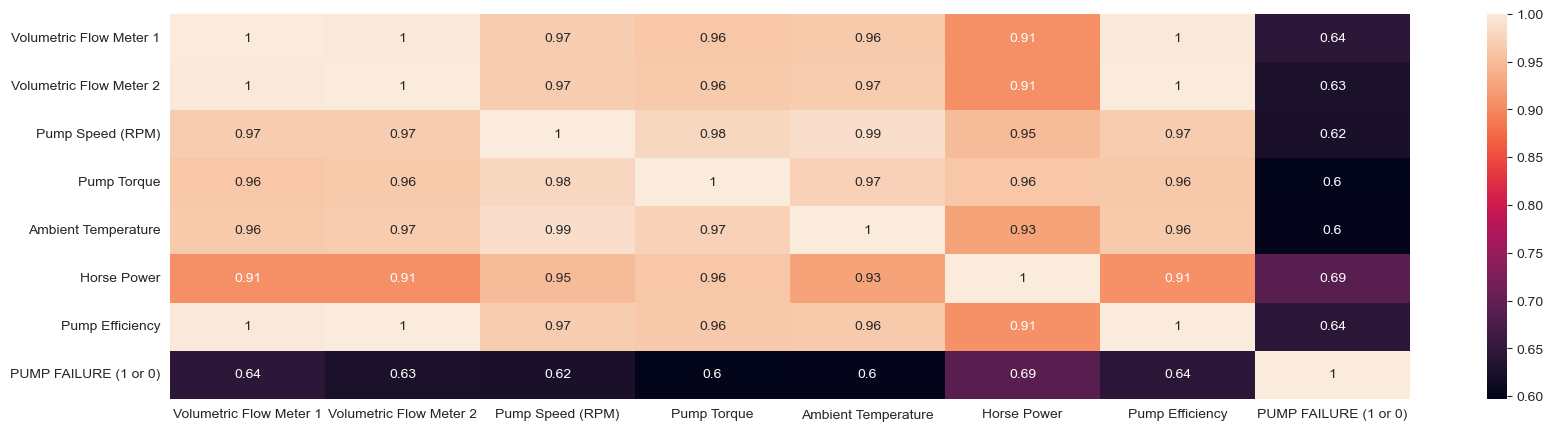

In [253]:
# Delete unrelated column in rolling std data
dfr_stdev_1=dfr_stdev.drop(columns='Data Source')
# Create a correlated dataframe
corr_matrix_stdev = dfr_stdev_1.corr()
# display the heatmap
sns.heatmap(corr_matrix_stdev, annot=True)

#### Question 7:

<b> Do any variables stand out? If yes, list these out below your heatmap. </b>

#### Answer:<b>


The primary factors contributing to pump failure include Horse Power, Pump Efficiency, Volumetric Flow Meter 1, and Volumetric Flow Meter 2.
</b>
    


### Step 14:  <span style="color:purple">Use OLS Regression Creating a Multivariate Regression Model</span> 
<b> Step 1:  Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables in the dataframe_raw dataset. </b>

<b> Step 2:  Repeat step 1 but this time use the dataframe_stdev you imported previously.</b>



In [258]:
#Dataframe_Raw
import pandas as pd
import statsmodels.api as sm

# Step 1: Establish DataFrames for independent and dependent variables

df = df_raw
df.columns=df.columns.str.strip()

# Define independent and dependent variables
independent_variables = df[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2',
       'Pump Speed (RPM)', 'Pump Torque', 'Ambient Temperature', 'Horse Power',
       'Pump Efficiency']]
dependent_variable = df['PUMP FAILURE (1 or 0)']

# Step 2: Add a constant to the independent variables DataFrame
independent_variables = sm.add_constant(independent_variables)

# Step 3: Store and fit the regression model
regression_model = sm.OLS(dependent_variable, independent_variables).fit()

# Step 4: Print the regression model summary
print(regression_model.summary())


                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Sun, 22 Sep 2024   Prob (F-statistic):          5.58e-233
Time:                           14:08:19   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [259]:
#Dataframe_Stdev
import pandas as pd
import statsmodels.api as sm

# Step 1: Establish DataFrames for independent and dependent variables

df1 = dfr_stdev_1


# Define independent and dependent variables
independent_variables = df1[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2',
       'Pump Speed (RPM)', 'Pump Torque', 'Ambient Temperature', 'Horse Power',
       'Pump Efficiency']]
dependent_variable = df1['PUMP FAILURE (1 or 0)']

# Step 2: Add a constant to the independent variables DataFrame
independent_variables = sm.add_constant(independent_variables)

# Step 3: Store and fit the regression model
regressive_model = sm.OLS(dependent_variable, independent_variables).fit()

# Step 4: Print the regression model summary
print(regressive_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                           14:08:19   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

#### Question 8:

<b> Compare the Models you've created and observe the R Squared displayed for each model - which model seems better and why? </b>


#### Answer:<b>
Generally, a higher R-squared value indicates a better fit of the model to the data. In this case, the R-squared based on rolling standard deviation is 0.778, compared to 0.362 for the raw data. Therefore, the R-squared based on rolling standard deviation provides a better fit.


</b>

### <span style="color:purple">Analysis of Coefficients </span>

<b> 
We will conduct further analysis using the rolling std data.


Step1: Using the .params method, extract the Coefficients from your regression_model.
    
Step2: create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. 
</b>


<Axes: >

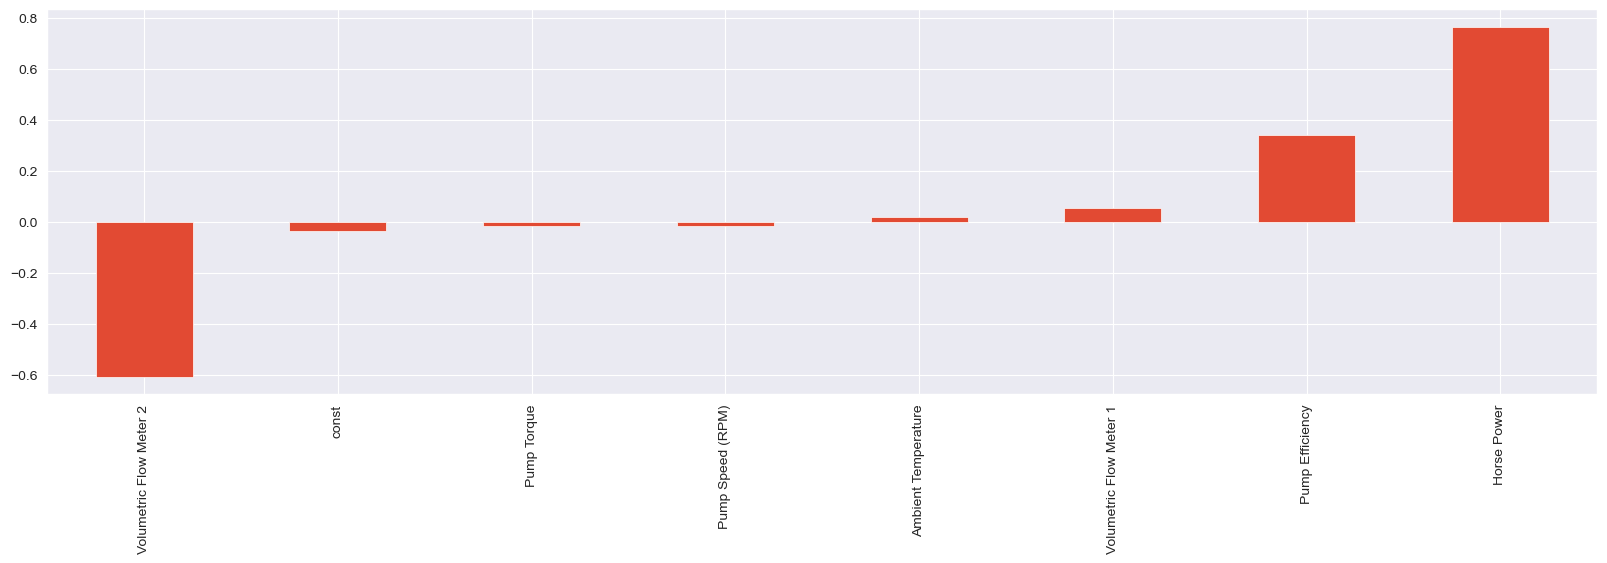

In [263]:
# Extract the co-efficients from the regressive_model
coef=regressive_model.params

# Sort the coefficients
coef=coef.sort_values()

# Display the coefficient
coef.plot(kind='bar')

#### Questio 8:

<b> Based on above plot, we now can identify which coefficients react most strongly with respect to Pump Failure. Which three (3) variables seem to showcase the strongest 'relationship' with respect to Pump Failure? </b>


#### Answer:

<b> Based on above plot, the three variables are: Volumetric Flow Meter 2, Pump Efficiency, and Horse Power which are strongly related to Pump Failure.
</b>


### Step 15: <span style="color:purple">Validate Predictions</span> 

<b> Validate the predictions. </b>
    


<b> 
i) Create a new column in the dataframe_stdev, called, 'Prediction'. 
    
ii) Generate a column of the regressive predictions.
    
iii) Create a Dual-Axis Plot with the following axes items: <p>
    
        Axes One would contain: Volumetric Flow Meter 2, Pump Efficiency and Horse Power 
        Axes two would contain: Pump Failure (1 or 0) and Prediction
</b>




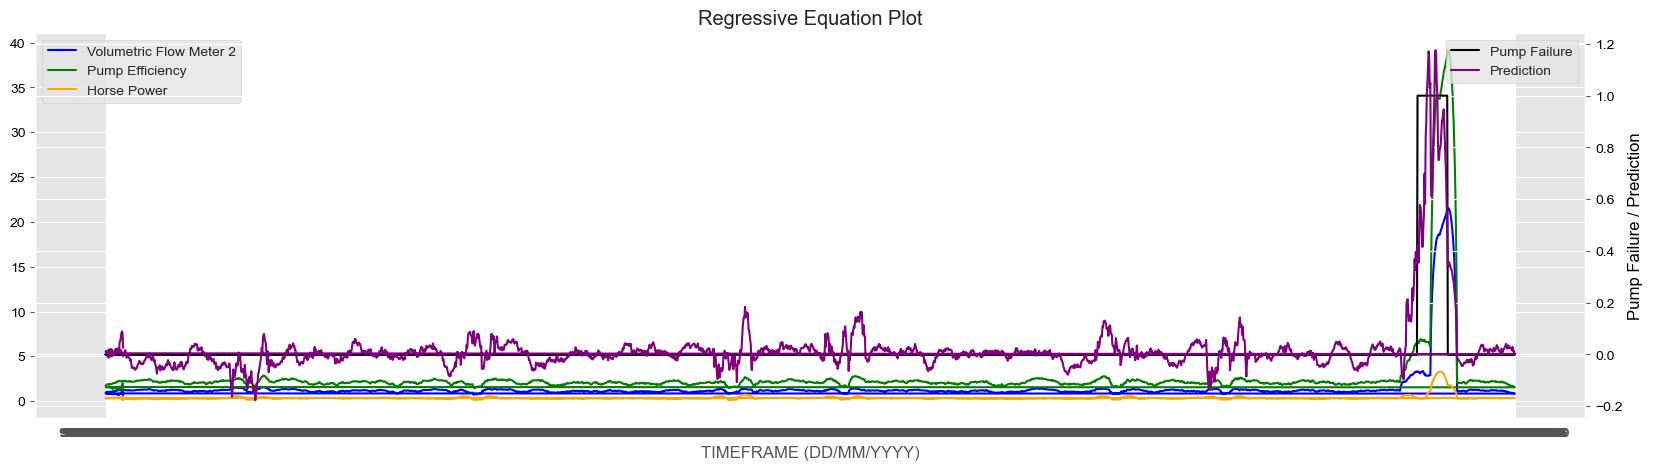

In [292]:
# Step 1: Apply predict() and to get regressive predictions from regressive_model.
predic=regressive_model.predict(independent_variables)

# Step 2: Create a new column in the dataframe df1 (rolling std data), called 'Prediction'
df1['Prediction'] = predic

# import Python lib
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Step 3: Create an empty plot
fig, ax1 = plt.subplots()

# Step 4: Plot the first dataset
    # Plot each variable separately
_=ax1.plot(df1.index, df1['Volumetric Flow Meter 2'], color='b', label='Volumetric Flow Meter 2')
_=ax1.plot(df1.index, df1['Pump Efficiency'], color='g', label='Pump Efficiency')
_=ax1.plot(df1.index, df1['Horse Power'], color='orange', label='Horse Power')

ax1.set_xlabel('TIMEFRAME (DD/MM/YYYY)')
ax1.set_ylabel(None,color='black')  # Common label for the first y-axis
ax1.tick_params(axis='y', labelcolor='black')

# Add a legend for the first dataset
ax1.legend(loc='upper left')

# Step 5: Create a second y-axis
ax2 = ax1.twinx()

# Create a Dual-Axis Plot 
_=ax2.plot(df1.index, df1['PUMP FAILURE (1 or 0)'], color='black', label='Pump Failure')
_=ax2.plot(df1.index, df1['Prediction'], color='purple', label='Prediction')

ax2.set_ylabel('Pump Failure / Prediction', color='black')  # Common label for the second y-axis
ax2.tick_params(axis='y', labelcolor='black')

# Add a legend for the second dataset
ax2.legend(loc='upper right')

# Step 6: Add title and show the plot
plt.title('Regressive Equation Plot')

# Step 7: Display the plot
plt.show()




#### This Python case study project encompasses the following skills:


<li> Create Line Plots and Box Plots </li>
<li> Understand Descriptive Statistics from the .describe() functions </li>
<li> How to Detect and Remove Outliers from the Dataset </li>
<li> How to Subset and Filter the Dataframes </li>
<li> How to use For Loops to smartly loop through data </li>
<li> How to use Dual Axes to Plot Multiple Variables on different axes </li>
<li> How to interpret Correlation Coefficients and Heatmaps </li>
<li> How to create and assess the goodness of fit for Linear Regression Models </li>




#### End of Project